In [45]:
# Load the libraries
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import math, time 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [46]:
#!wget "https://www.kaggle.com/oddrationale/mnist-in-csv/download"

In [47]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [48]:
train_dataset=pd.read_csv("./sample_data/mnist_train_small.csv", sep=',')
print(train_dataset.shape)

(19999, 785)


In [49]:
train_dataset.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
test_dataset=pd.read_csv("./sample_data/mnist_test.csv", sep=',')
print(test_dataset.shape)

(9999, 785)


In [51]:
X_tr = train_dataset.iloc[:,1:] # iloc ensures X_tr will be a dataframe
y_tr = train_dataset.iloc[:, 0]

In [52]:
y_tr.head()

0    5
1    7
2    9
3    5
4    2
Name: 6, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=30)

In [54]:
print(X_train.shape)

(15999, 784)


In [55]:
print(X_test.shape)

(4000, 784)


In [56]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Accuracy for training data

In [57]:
print("score = %3.2f" %(clf.score(X_test, y_test)))

score = 0.94


In [58]:
y_pred = clf.predict(X_test)

In [59]:
classes=['0','1','2','3','4','5','6','7','8','9']

In [60]:
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       383
           1       0.96      0.99      0.97       444
           2       0.93      0.93      0.93       407
           3       0.93      0.91      0.92       413
           4       0.93      0.95      0.94       370
           5       0.95      0.93      0.94       380
           6       0.98      0.95      0.96       388
           7       0.89      0.95      0.92       433
           8       0.93      0.93      0.93       381
           9       0.94      0.90      0.92       401

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



Comparison with other models

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X_tr, y_tr, test_size=0.3, random_state=41)

Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtmodel=DecisionTreeClassifier(criterion="entropy",splitter="random",max_depth=5
                             ,min_samples_split=3,min_weight_fraction_leaf=0.3,max_features="sqrt").fit(X_train,y_train)
dtmodel

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.3, presort='deprecated',
                       random_state=None, splitter='random')

In [63]:
from sklearn.metrics import *
print("Accuracy: ",accuracy_score(y_test, dtmodel.predict(X_test)))
print("Recall: ",recall_score(y_test, dtmodel.predict(X_test), average=None)[0])
print("Precision: ",precision_score(y_test, dtmodel.predict(X_test), average=None)[0])

Accuracy:  0.20566666666666666
Recall:  0.0
Precision:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train,y_train)
print("Accuracy: ",accuracy_score(y_test, clf.predict(X_test)))
print("Recall: ",recall_score(y_test, clf.predict(X_test), average=None)[0])
print("Precision: ",precision_score(y_test, clf.predict(X_test), average=None)[0])

Accuracy:  0.9013333333333333
Recall:  0.9481605351170569
Precision:  0.949748743718593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Perceptron

In [65]:
from sklearn.linear_model import Perceptron
percmodel = Perceptron(tol=1e-3, random_state=0)
percmodel.fit(X_train,y_train)
print("Accuracy: ",accuracy_score(y_test, percmodel.predict(X_test)))
print("Recall: ",recall_score(y_test, percmodel.predict(X_test), average=None)[0])
print("Precision: ",precision_score(y_test, percmodel.predict(X_test), average=None)[0])

Accuracy:  0.8968333333333334
Recall:  0.9297658862876255
Precision:  0.972027972027972


Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
ranmodel = RandomForestClassifier(max_depth=2, random_state=0)
ranmodel.fit(X_train,y_train)
print("Accuracy: ",accuracy_score(y_test, ranmodel.predict(X_test)))
print("Precision: ",precision_score(y_test, ranmodel.predict(X_test), average=None)[0])
print("Recall: ",recall_score(y_test, ranmodel.predict(X_test), average=None)[0])

Accuracy:  0.651
Precision:  0.6143308746048473
Recall:  0.9749163879598662


AdaBoost

In [67]:
from sklearn.ensemble import AdaBoostClassifier
adamodel = AdaBoostClassifier(n_estimators=100, random_state=0)
adamodel.fit(X_train,y_train)
print("Precision: ",precision_score(y_test, adamodel.predict(X_test), average=None)[0])
print("Accuracy: ",accuracy_score(y_test, adamodel.predict(X_test)))
print("Recall: ",recall_score(y_test, adamodel.predict(X_test), average=None)[0])

Precision:  0.6955555555555556
Accuracy:  0.5936666666666667
Recall:  0.5234113712374582


Neural Network

In [68]:
import keras
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.optimizers import rmsprop_v2

In [69]:
batch_size = 128
num_classes = 10
epochs = 2

In [70]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 512)               16896     
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
 flatten (Flatten)           (None, 10)                0         
                                                                 
Total params: 309,802
Trainable params: 309,802
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])

In [72]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=5)

Epoch 1/5
110/110 [==============================] - 2s 11ms/step - loss: 1.9543 - accuracy: 0.2981
Epoch 2/5
110/110 [==============================] - 1s 11ms/step - loss: 1.0179 - accuracy: 0.6410
Epoch 3/5
110/110 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.7771
Epoch 4/5
110/110 [==============================] - 1s 11ms/step - loss: 0.5751 - accuracy: 0.8159
Epoch 5/5
110/110 [==============================] - 1s 11ms/step - loss: 0.5164 - accuracy: 0.8408


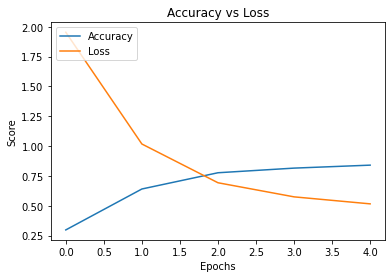

In [73]:
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['loss'])
plt.title('Accuracy vs Loss')
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [74]:
X_t = test_dataset.iloc[:,1:] # iloc ensures X_tr will be a dataframe
y_t = test_dataset.iloc[:, 0]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_t,y_t,test_size=0.2, random_state=30)

In [76]:
print(X_train.shape)

(7999, 784)


In [77]:
print(X_test.shape)

(2000, 784)


In [78]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Accuracy for testing dataset

In [79]:
print("score = %3.2f" %(clf.score(X_test, y_test)))

score = 0.94


In [80]:
y_pred = clf.predict(X_test)

In [81]:
classes=['0','1','2','3','4','5','6','7','8','9']

In [82]:
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       201
           1       1.00      1.00      1.00       225
           2       0.91      0.94      0.92       192
           3       0.96      0.93      0.95       205
           4       0.94      0.96      0.95       212
           5       0.94      0.93      0.93       169
           6       0.95      0.98      0.97       198
           7       0.89      0.95      0.92       208
           8       0.95      0.89      0.92       188
           9       0.91      0.89      0.90       202

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

